In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

Задание 1 из темы "Обучение без учителя"

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
data=boston.data

In [5]:
target=boston.target

In [6]:
feature_names=boston.feature_names

In [7]:
X=pd.DataFrame(data,columns=feature_names)

In [8]:
X.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1      

In [9]:
y=pd.DataFrame(target,columns=['price'])

In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбиение данных на тренировочные и тестовые

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

Масштабируем данные

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
X_train_scaled=scaler.fit_transform(X_train)

In [17]:
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=feature_names)

In [19]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=feature_names)

Построение модели TSNE

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne=TSNE(n_components=2, learning_rate=250, random_state=42)

In [22]:
X_train_tsne=tsne.fit_transform(X_train_scaled)

In [23]:
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

In [24]:
X_train_tsne.shape

(404, 2)

Построение диаграммы рассеяния

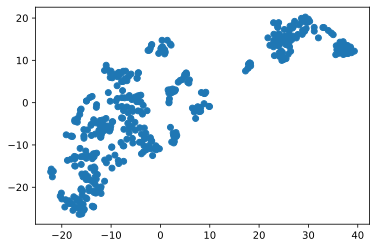

In [25]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])

Задание 2 из темы "Обучение без учителя"

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans=KMeans(n_clusters=3, max_iter=100, random_state=42)

In [28]:
labels_train=kmeans.fit_predict(X_train_scaled)

In [29]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

Text(35, 8, 'Кластер 2')

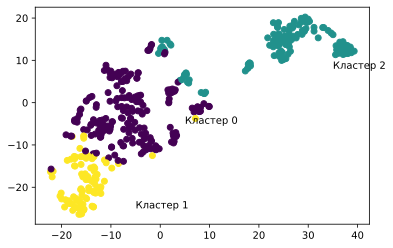

In [30]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=labels_train)
plt.text(5,-5,'Кластер 0')
plt.text(-5,-25,'Кластер 1')
plt.text(35,8,'Кластер 2')

Определим средние значения цены в разных кластерах

In [31]:
y_train[labels_train==0].mean()

price    24.958115
dtype: float64

In [32]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [33]:
y_train[labels_train==2].mean()

price    27.788372
dtype: float64

Определим средние значения преступлений в разных кластерах

In [34]:
X_train.loc[labels_train==0,'CRIM'].mean()

0.42166020942408367

In [35]:
X_train.loc[labels_train==1,'CRIM'].mean()

10.797028425196853

In [36]:
X_train.loc[labels_train==2,'CRIM'].mean()

0.07356558139534886

Задание 3 из темы "Обучение без учителя"

In [37]:
labels_test=kmeans.predict(X_test_scaled)

In [38]:
pd.value_counts(labels_test)

0    51
1    35
2    16
dtype: int64

In [39]:
X_test_tsne=tsne.fit_transform(X_test_scaled)

Text(-3, -13, 'Кластер 2')

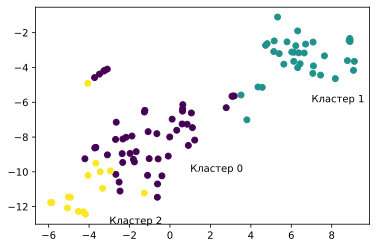

In [41]:
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1],c=labels_test)
plt.text(1,-10,'Кластер 0')
plt.text(7,-6,'Кластер 1')
plt.text(-3,-13,'Кластер 2')


Определим средние значения цены в разных кластерах

In [43]:
y_test[labels_test==0].mean()

price    21.860784
dtype: float64

In [44]:
y_test[labels_test==1].mean()

price    16.437143
dtype: float64

In [45]:
y_test[labels_test==2].mean()

price    31.35
dtype: float64

Определим средние значения преступлений в разных кластерах

In [46]:
X_test.loc[labels_test==0,'CRIM'].mean()

0.26607882352941176

In [47]:
X_test.loc[labels_test==1,'CRIM'].mean()

10.165531142857143

In [49]:
X_test.loc[labels_test==2,'CRIM'].mean()

0.062060000000000004